Data Preview:
        alpha      delta         u         g         r         i         z  \
0  240.052313  34.255821  24.01377  23.98592  22.53496  20.97958  19.85996   
1  212.817636  43.170697  24.98241  23.00377  21.27729  20.18667  19.58927   
2  110.805667  42.794380  19.05334  17.88926  17.17967  16.76607  16.50613   
3  349.255747   1.061327  22.66089  22.34669  21.67616  21.12133  20.47592   
4  135.267342  33.436172  21.61335  21.29505  20.96795  20.76065  20.40137   

   run_ID  rerun_ID  cam_col  field_ID   spec_obj_ID  redshift  plate    MJD  \
0    3965       301        3        70  1.229608e+19  0.000000  10921  58251   
1    3699       301        2       154  6.817392e+18  0.599489   6055  56102   
2    4264       301        5        40  2.099885e+18  0.107371   1865  53312   
3    4188       301        6        38  1.036183e+19  1.104942   9203  57692   
4    3560       301        5       189  1.152722e+19  2.394648  10238  58155   

   fiber_ID   class  
0       465  G

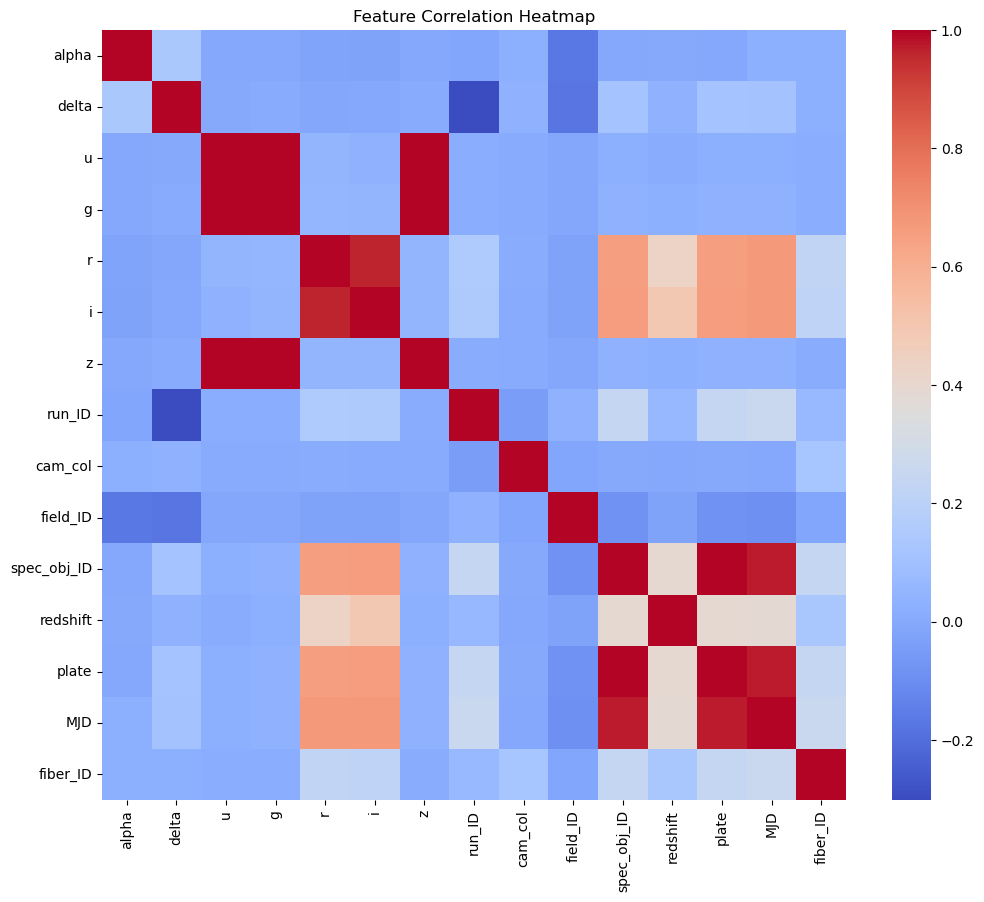

KeyError: "['rerun_ID'] not found in axis"

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

# Load the data
path = "D:\\Karunadu Internship\\ProjectComplete\\full\\ML\\train_dataset.csv"
data = pd.read_csv(path)
print("Data Preview:")
print(data.head())

# Check class distribution
print("\nClass Distribution:")
print(data['class'].value_counts())

# Check for constant/near-constant features
constant_features = data.loc[:, data.nunique() == 1].columns
if len(constant_features) > 0:
    print(f"\nDropping constant features: {list(constant_features)}")
    data = data.drop(columns=constant_features)

# Drop non-numeric columns before correlation
numeric_data = data.select_dtypes(include=[np.number])

# Correlation analysis (only for numeric features)
plt.figure(figsize=(12, 10))
sns.heatmap(numeric_data.corr(), annot=False, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

# Split input and output
output = data['class']
inputs = data.drop(['class', 'alpha', 'delta', 'u', 'g', 'r', 'i', 'z', 
                    'run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 
                    'redshift', 'plate', 'MJD', 'fiber_ID'], axis=1)

# Normalize the features
scaler = StandardScaler()
inputs_scaled = scaler.fit_transform(inputs)

# Split the data
x_train, x_test, y_train, y_test = train_test_split(inputs_scaled, output, train_size=0.8, random_state=42)

# Train the model
model = GaussianNB()
model.fit(x_train, y_train)

# Make predictions
y_pred = model.predict(x_test)

# Model evaluation
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Visualizing predictions
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual')
plt.scatter(range(len(y_pred)), y_pred, color='red', label='Predicted', alpha=0.6)
plt.legend()
plt.show()
